# Movie Lens dataset - User Rating Classification

#### Dataset Data: https://grouplens.org/datasets/movielens/100k/

Three datasets which are used in the classification is as follows

<strong>u.data</strong><BR>    The full u data set, 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies.  Users and items are numbered consecutively from 1.  The data is randomly ordered. This is                                a tab separated list of <BR> user id | item id | rating | timestamp. 

<strong>u.item</strong><br>    Information about the items (movies); this is a tab separated list of <br>
                               movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | <br>
                               Children's | Comedy | Crime | Documentary | Drama | Fantasy | <br>
                               Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | <br>
                               Thriller | War | Western | <br>
                               The last 19 fields are the genres, a 1 indicates the movi is of that genre, a 0 indicates it is not; movies can be in several genres at once.The movie ids are the ones used in the u.data dataset.

<strong>u.user</strong><br>    Demographic information about the users; this is a tab separated list of
                               user id | age | gender | occupation | zip code <br>
                               The user ids are the ones used in the u.data data set.


<strong>u.genre</strong><br>   A list of the genres.

<strong>u.info</strong><br>    The number of users, items, and ratings in the u data set.

<strong>u.occupation</strong><br>  A list of the occupations.
    

## Library imports

In [723]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score

## Load the datasets and validate data load

In [676]:
# Load the ratings data

udata = pd.read_csv("dataset\\ml-100k\\u.data", sep="\t", header=None, names=['userid', 'itemid', 'rating', 'timestamp'])
udata.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [677]:
# Check the data structure for ratings dataset
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userid     100000 non-null  int64
 1   itemid     100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [678]:
# Check for any missing data
print(udata.isna().sum())

userid       0
itemid       0
rating       0
timestamp    0
dtype: int64


In [679]:
# Load the movies dataset
uitem = pd.read_csv("dataset\\ml-100k\\u.item", sep="|", header=None, names=['movieid','movietitle','releasedate','videoreleasedate','imdburl','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
uitem.head()

,movieid,movietitle,releasedate,videoreleasedate,imdburl,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [680]:
# check the data structure for movies dataset
uitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieid           1682 non-null   int64  
 1   movietitle        1682 non-null   object 
 2   releasedate       1681 non-null   object 
 3   videoreleasedate  0 non-null      float64
 4   imdburl           1679 non-null   object 
 5   unknown           1682 non-null   int64  
 6   Action            1682 non-null   int64  
 7   Adventure         1682 non-null   int64  
 8   Animation         1682 non-null   int64  
 9   Children          1682 non-null   int64  
 10  Comedy            1682 non-null   int64  
 11  Crime             1682 non-null   int64  
 12  Documentary       1682 non-null   int64  
 13  Drama             1682 non-null   int64  
 14  Fantasy           1682 non-null   int64  
 15  Film-Noir         1682 non-null   int64  
 16  Horror            1682 non-null   int64  


In [681]:
# Check for any missing data in movies dataset
uitem.isna().sum()

movieid                0
movietitle             0
releasedate            1
videoreleasedate    1682
imdburl                3
unknown                0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
dtype: int64

We see missing data in 'videoreleasedate', 'releasedate' and 'imdburl'

In [682]:
# Load the User data
users = pd.read_csv("dataset\\ml-100k\\u.user", sep="|", header=None, names=['userid','age','gender','occupation','zipcode'])
users.head()

,userid,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [683]:
# check the data structure for users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zipcode     943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [684]:
# Check for any missing data in users dataset
users.isna().sum()

userid        0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64

## Join datasets and create consolidated master for exploration, feature engineering and modelling

In [685]:
# We will merge the datasets on specific keys and create the consolidated master

# first merge the users and ratings dataset on user id
userratings = pd.merge(users, udata, on='userid')

# second merge the userratings dataset with movies dataset on movieid
userratings = pd.merge(userratings, uitem, left_on='itemid', right_on='movieid')

# Since itemid and movieid are the same, we will drop one
userratings.drop(labels='itemid', axis=1, inplace=True)

userratings.head()

,userid,age,gender,occupation,zipcode,rating,timestamp,movieid,movietitle,releasedate,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,4,878542420,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,4,882140552,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,4,880130803,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,5,884305271,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,4,888204597,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [686]:
# Check how many movie userid 1 has viewed and whats the details

userratings[userratings['userid'] == 1]

,userid,age,gender,occupation,zipcode,rating,timestamp,movieid,movietitle,releasedate,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,4,878542420,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
59,1,24,M,technician,85711,3,888732928,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,0,0,0,0
125,1,24,M,technician,85711,4,878542699,33,Desperado (1995),01-Jan-1995,...,0,0,0,0,0,1,0,1,0,0
222,1,24,M,technician,85711,4,875072547,160,Glengarry Glen Ross (1992),01-Jan-1992,...,0,0,0,0,0,0,0,0,0,0
291,1,24,M,technician,85711,4,887431883,20,Angels and Insects (1995),01-Jan-1995,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40866,1,24,M,technician,85711,4,875072173,28,Apollo 13 (1995),01-Jan-1995,...,0,0,0,0,0,0,0,1,0,0
41142,1,24,M,technician,85711,5,874965478,172,"Empire Strikes Back, The (1980)",01-Jan-1980,...,0,0,0,0,0,1,1,0,1,0
41509,1,24,M,technician,85711,3,875241498,122,"Cable Guy, The (1996)",14-Jun-1996,...,0,0,0,0,0,0,0,0,0,0
41615,1,24,M,technician,85711,5,878542589,152,Sleeper (1973),01-Jan-1973,...,0,0,0,0,0,0,1,0,0,0


In [687]:
# Check how many users have rated movieid 1 and its details

userratings[userratings['movieid'] == 1]

,userid,age,gender,occupation,zipcode,rating,timestamp,movieid,movietitle,releasedate,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
26054,1,24,M,technician,85711,5,874965758,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26055,2,53,F,other,94043,4,888550871,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26056,5,33,F,other,15213,4,875635748,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26057,6,42,M,executive,98101,4,883599478,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26058,10,53,M,lawyer,90703,4,877888877,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26501,934,61,M,engineer,22902,2,891225958,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26502,935,42,M,doctor,66221,3,884472064,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26503,936,24,M,other,32789,4,886832453,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
26504,938,38,F,technician,55038,4,891356314,1,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

### Explore User entity

#### gender attribute

M    74260
F    25740
Name: gender, dtype: int64


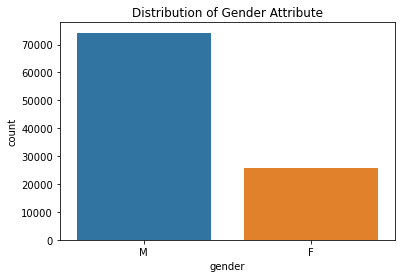

In [688]:
# Visualize user gender distribution

print(userratings['gender'].value_counts())

# Visualize the frequency counts
plt.title("Distribution of Gender Attribute")
sns.countplot(userratings['gender']);

student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64


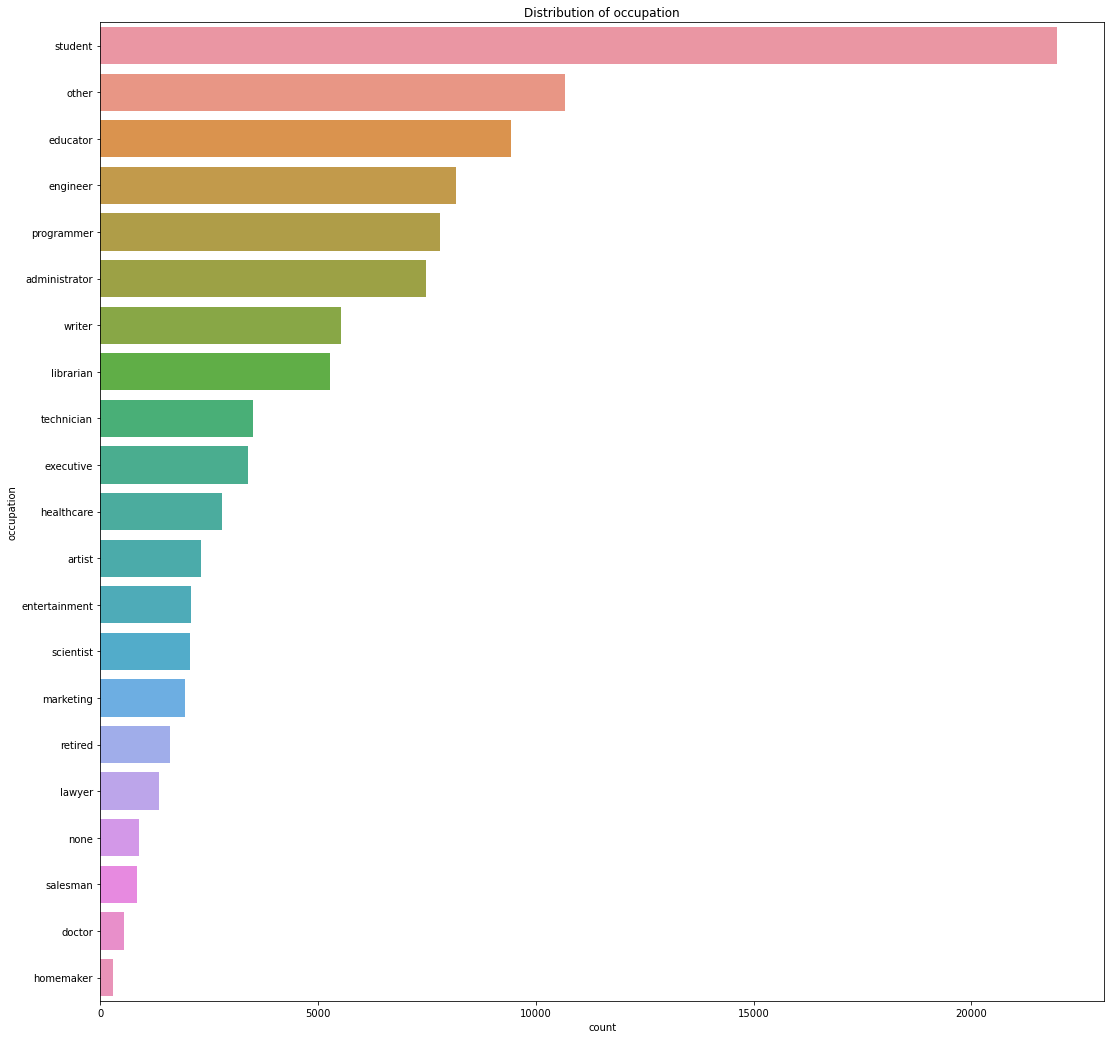

In [689]:
# Explore user occupation distribution

# Getting the top 5 occupation based on the number of movies rated
print(userratings['occupation'].value_counts())

# Distribution of occupation
plt.figure(figsize=(18, 18))
plt.title("Distribution of occupation")
sns.countplot(y='occupation', data=userratings, order = userratings['occupation'].value_counts().index);

Highest viewers amogst users are all 'students'

#### Age attribute

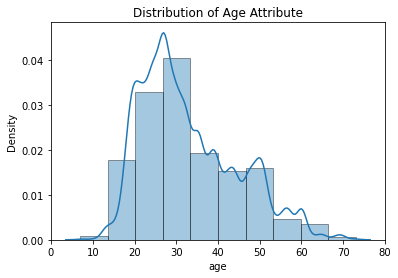

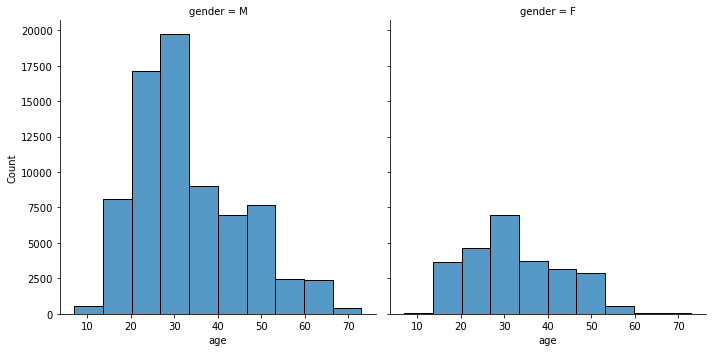

In [690]:
# Explore the age attribute of the user

plt.title('Distribution of Age Attribute')
sns.distplot(userratings['age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# Explore attribute of the user by age
sns.displot(data=userratings, x='age', col='gender', multiple='dodge', bins=10);

Most of users belong to the age group of 20 - 30 

### Explore Movie Entity

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64


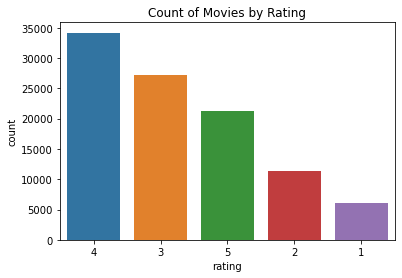

In [691]:
# Lets study the rating attribute..userratings
# Number of movies by rating

print(userratings['rating'].value_counts())

# Visualize the frequency counts
plt.title("Count of Movies by Rating")
sns.countplot(userratings['rating'], order = userratings['rating'].value_counts().index);

Most of the movies are rated as 4 and then 3...

#### Top 20 most rated movies in the dataset

In [692]:
userratings.groupby('movietitle').size().sort_values(ascending=False)[:20]

movietitle
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
dtype: int64

#### Top 20 Most watched movies

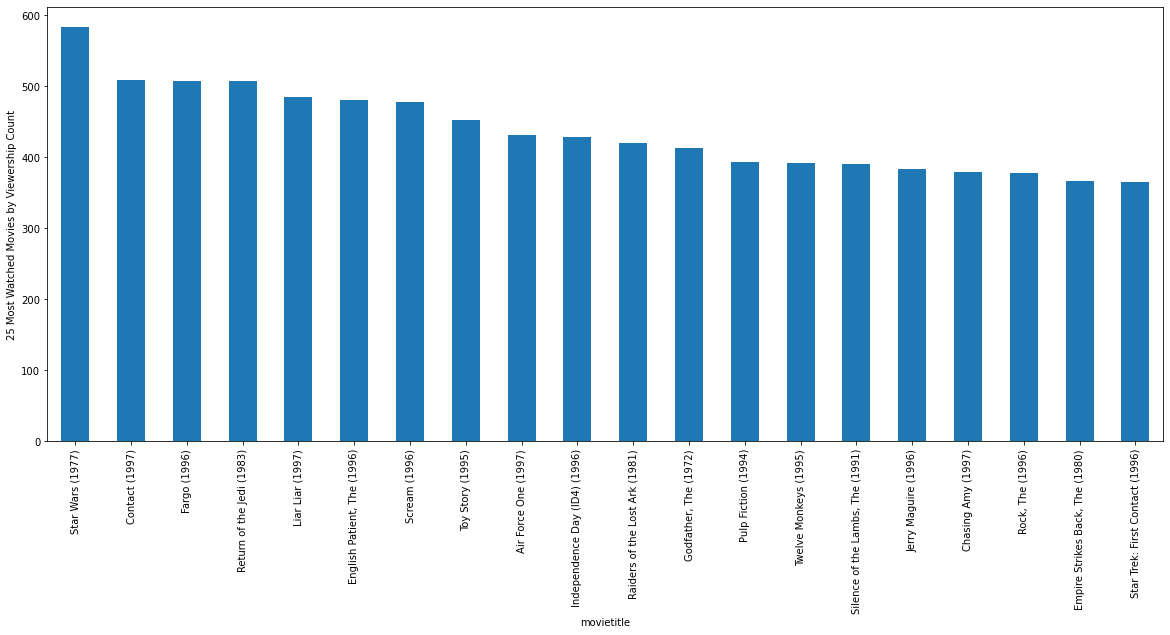

In [693]:
df = userratings.groupby("movietitle").size().sort_values(ascending=False)[:20]
plt.figure(figsize=(20, 8))
plt.ylabel("25 Most Watched Movies by Viewership Count")
plt.xlabel("Viewership Count")
df.plot(kind="bar");

#### Top 20 Highest Rated Movies

<AxesSubplot:ylabel='movietitle'>

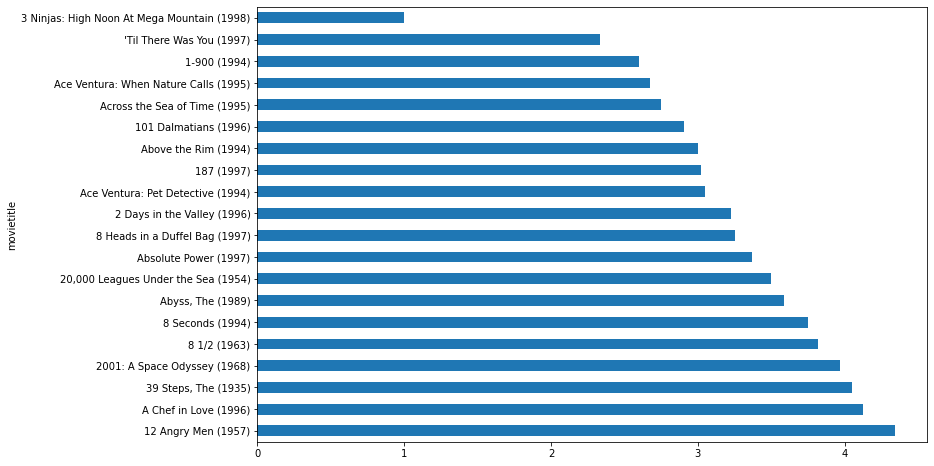

In [694]:
ratings_by_movies = userratings.groupby('movietitle').agg([np.mean, np.size])
ratings_by_movies.drop('userid', axis=1, inplace=True)
ratings_by_movies['rating']['mean'].head(20).sort_values(ascending=False).plot(kind='barh', figsize=(12, 8))

#### The most common genre of movies based on ratings

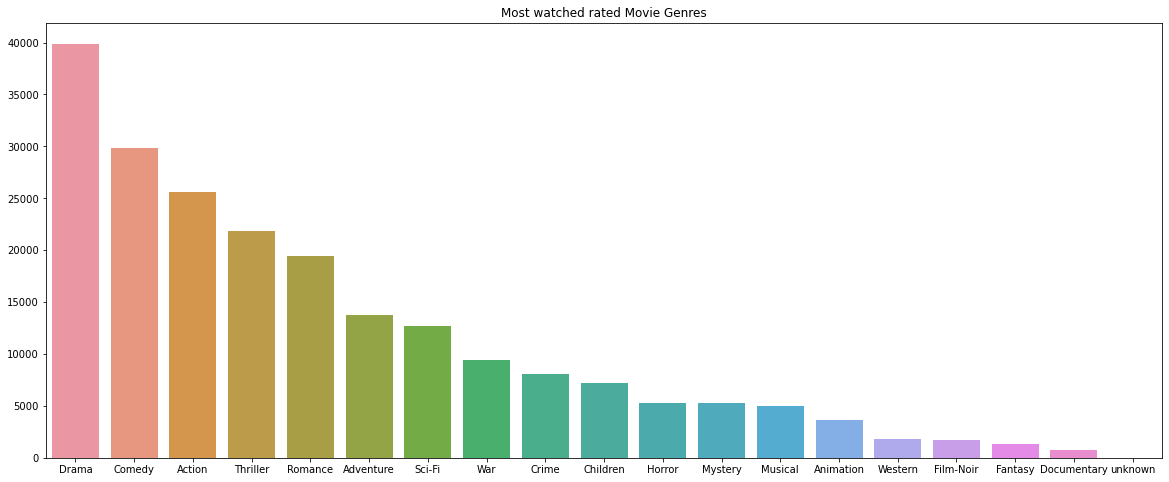

In [695]:
generes = ['unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

genreCounts = userratings.loc[:, generes].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
plt.title("Most watched rated Movie Genres")
sns.barplot(x=genreCounts.index, y=genreCounts.values);

#### Movie genres by Gender of users - Whether a gender has genre preferences

<AxesSubplot:>

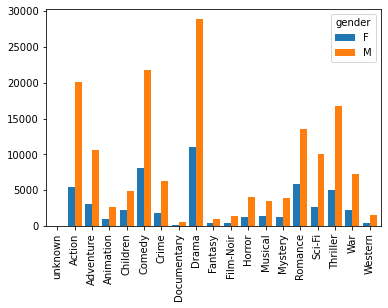

In [696]:
df = userratings.groupby('gender').sum().loc[:, generes].transpose()
df.plot(kind='bar', width=0.8)

## Feature Engineering - Preparation of Data for modelling

#### We will create a new column called rating_category and encode the column as , <br>
----
If rating >= 4, rating_category = high, <br>
if rating = 3, rating_category = neutral <br>
else rating_category = low

----
<strong> This will be our target varible for rating prediction or classifying (predicting for a user) - which rating is most appropriate for a movie </strong>

In [697]:
# we will use lambda expressions

userratings['rating_category'] = userratings['rating'].apply(lambda x : 'high' if x >= 4 else 'neutral' if x == 3 else 'low')

#### Feature engineering on 'occupation' attribute

- The attribute has 21 levels
- With so many levels in a categorical attribute, tree based algorithm will have natural bias towards using this attribute as first level splitting. 
- In order to reduce, we would be going ahead and creating another attribute with reduced number of categories

#### We will derive another attribute with reduced levels based on the occupation and respective viewership_count

-------
If the viewership_count is > = 10000 - Viewership Category - 'highly active' - regularly watches and rates movies<br>
If the viewership_count is > = 5000 and < 10000 - Viewership Category - 'active' - watches and rates movies<br>
If the viewership_count is > = 2000 and < 5000  - Viewership Category - 'moderately active' - watches and rates movies moderately<br>
else                                              Viewership Category - 'low active'  

-------

In [698]:
occupation_map = pd.DataFrame(userratings['occupation'].value_counts())
occupation_map = occupation_map.reset_index()
occupation_map.columns = ['occupation', 'viewership_count']


occupation_map['viewership_category'] = occupation_map['viewership_count'].apply(lambda x : 'highly active' if x >= 10000 else 'active' if x >= 5000 and x < 10000 else 'moderatively active' if x >= 2000 and x                                                                                                < 5000 else 'low active' )


# Now we can drop the viewership_count
occupation_map.drop('viewership_count', axis=1, inplace=True)

# Now we will join this dataframe with the master dataframe on the basis of occupation
userratings = pd.merge(userratings, occupation_map, on='occupation')
userratings.head()

,userid,age,gender,occupation,zipcode,rating,timestamp,movieid,movietitle,releasedate,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_category,viewership_category
0,1,24,M,technician,85711,4,878542420,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,high,moderatively active
1,456,24,M,technician,31820,4,881373228,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,high,moderatively active
2,1,24,M,technician,85711,3,888732928,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,0,0,neutral,moderatively active
3,458,47,M,technician,Y1A6B,4,886396460,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,0,0,high,moderatively active
4,738,35,M,technician,95403,4,875351404,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,0,0,high,moderatively active


In [699]:
#### We will use releasedate column and extract Quarter of the year in a separate column
userratings['release_month'] = pd.DatetimeIndex(userratings['releasedate']).month
userratings['release_quarter'] = userratings['release_month'].apply(lambda x : 1 if x < 3.0 else 2 if x > 3.0 and x <= 6.0 else 3 if x > 6.0 and x <= 9.0 else 4 )
userratings.head()


,userid,age,gender,occupation,zipcode,rating,timestamp,movieid,movietitle,releasedate,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_category,viewership_category,release_month,release_quarter
0,1,24,M,technician,85711,4,878542420,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,high,moderatively active,1.0,1
1,456,24,M,technician,31820,4,881373228,61,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,high,moderatively active,1.0,1
2,1,24,M,technician,85711,3,888732928,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,neutral,moderatively active,1.0,1
3,458,47,M,technician,Y1A6B,4,886396460,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,high,moderatively active,1.0,1
4,738,35,M,technician,95403,4,875351404,189,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,high,moderatively active,1.0,1


#### We will drop the columns which are not needed for modelling

----

<strong>occupation</strong>                              has been transformed to viewership_category based on viewing and rating counts<br>
<strong>rating</strong>                                  has been transformed to rating_category which is our target variable<br>
<strong>releasedate</strong>                             has been transformed to release_quarter of the given year<br>

----

In [700]:
userratings.drop(labels=['userid', 'occupation', 'zipcode', 'rating', 'timestamp', 'movieid', 'movietitle', 'releasedate','release_month','videoreleasedate', 'imdburl'], axis=1, inplace=True)
userratings.head()

,age,gender,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_category,viewership_category,release_quarter
0,24,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,high,moderatively active,1
1,24,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,high,moderatively active,1
2,24,M,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,neutral,moderatively active,1
3,47,M,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,high,moderatively active,1
4,35,M,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,high,moderatively active,1


#### Using LabelEncoder transformations

In [701]:
userratings['gender'] = LabelEncoder().fit_transform(userratings['gender'])
userratings['rating_category'] = LabelEncoder().fit_transform(userratings['rating_category'])
userratings['viewership_category'] = LabelEncoder().fit_transform(userratings['viewership_category'])
userratings.head()

,age,gender,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_category,viewership_category,release_quarter
0,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
1,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
2,24,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,2,3,1
3,47,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1
4,35,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1


## Seggregate features and target variable and perform a Train-Test Split

In [702]:
features = userratings.drop('rating_category', axis=1)
target = userratings['rating_category']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101, stratify=target)

## Modelling - Logistic Regression

In [703]:
logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)

LogisticRegression()

### Displaying the coefficients and building the Logisitc Regression equation

In [704]:
print(f"Intercept of the fitted model : {logmodel.intercept_}")
print("\n")
print(f"Coefficients of the fitted logistic model")
log_odds = logmodel.coef_[0]
pd.DataFrame(log_odds, 
             features.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Intercept of the fitted model : [ 0.57716642 -0.33560784 -0.24155858]


Coefficients of the fitted logistic model


,coef
War,0.319546
Animation,0.280789
Film-Noir,0.245924
Drama,0.242697
Mystery,0.166093
Documentary,0.119830
Romance,0.119079
Sci-Fi,0.109047
Crime,0.101178
Western,0.096562


### Model Predictions and Evaluation

In [722]:
predictions = logmodel.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, predictions))
print("Accuracy Score \n")
print(accuracy_score(target_test, predictions))
print("\n")

Confusion Matrix
[[16558    26    28]
 [ 5162    31    51]
 [ 8093    23    28]]


Accuracy Score
0.5539


Classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.71     16612
           1       0.39      0.01      0.01      5244
           2       0.26      0.00      0.01      8144

    accuracy                           0.55     30000
   macro avg       0.40      0.34      0.24     30000
weighted avg       0.45      0.55      0.40     30000

Accuracy Score 

0.5539




### Building Logistic Regression Model using K Fold Cross Validation - This is being tried for an attempt to improve overall accuracy

#### Build and execute the model

In [712]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

# initialize the stratifiedKFold
stratKFold = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

C_values = [0.001, 0.01, 0.05, 0.1, 1., 10., 100.]
logistic = LogisticRegressionCV(Cs=C_values, fit_intercept=True, cv=stratKFold, verbose=1, 
                                random_state=101)

logistic.fit(features_train, target_train)

# The coefficients and intercepts can be arrived at

print("Train Coefficient:" , logistic.coef_) #weights of each feature
print("\n")
print("Train Intercept:" , logistic.intercept_) #value of intercept


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Train Coefficient: [[ 3.58051974e-03 -4.46762313e-03  4.60174325e-04 -1.04087884e-01
   6.31530650e-02  4.07227618e-01 -2.52848397e-01 -5.54039800e-02
   8.45934584e-02  2.44872622e-01  2.70837340e-01 -2.58157673e-01
   3.67200173e-01 -1.44607526e-01  1.12556354e-02  1.32629676e-01
   1.27617272e-01  1.13046663e-01  4.64789588e-02  2.97932468e-01
   1.45314454e-01 -3.74061415e-02 -1.06074287e-01]
 [-6.72055928e-03 -3.65364469e-02  3.37525918e-04  5.49179867e-02
  -7.58692208e-02 -3.84823643e-01  1.91527458e-01  2.87989242e-02
  -3.50703599e-02 -1.16662523e-01 -2.53666403e-01  1.64035229e-01
  -3.50768548e-01  1.91369589e-01  3.51025013e-03 -1.06790091e-01
  -1.24848473e-01 -6.00882950e-02 -7.78329512e-02 -1.98969298e-01
  -2.27598039e-01  5.64121996e-02  9.29635781e-02]
 [ 3.14003954e-03  4.10040700e-02 -7.97700243e-04  4.91698971e-02
   1.27161557e-02 -2.24039749e-02  6.13209388e-02  2.66050558e-02
  -4.9

#### Get the key confusion Matrix parameters from KFold Cross Validations

In [721]:
cvPredictions = logistic.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, cvPredictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, cvPredictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, cvPredictions))
print("Accuracy Score \n")
print(accuracy_score(target_test, cvPredictions))
print("\n")

Confusion Matrix
[[16531    51    30]
 [ 5127    60    57]
 [ 8059    36    49]]


Accuracy Score
0.5546666666666666


Classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.71     16612
           1       0.41      0.01      0.02      5244
           2       0.36      0.01      0.01      8144

    accuracy                           0.55     30000
   macro avg       0.44      0.34      0.25     30000
weighted avg       0.48      0.55      0.40     30000

Accuracy Score 

0.5546666666666666




## Modelling - Random Forest Classifier

In [716]:
# we will build the random forest classifier both using entropy and gini index
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(features_train, target_train)

RandomForestClassifier()

### Model Predictions and Evaluation

In [720]:
predictions = rfc.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index\n")
print(confusion_matrix(target_test,predictions))
print("\n")
print("Classification Report \n")
print(classification_report(target_test,predictions))
print("\n")
print("Accuracy Score \n")
print(accuracy_score(target_test, predictions))
print("\n")

Confusion Matrix - Random Forest Using Entropy Index

[[12611  1282  2719]
 [ 2761  1204  1279]
 [ 5122  1056  1966]]


Classification Report 

              precision    recall  f1-score   support

           0       0.62      0.76      0.68     16612
           1       0.34      0.23      0.27      5244
           2       0.33      0.24      0.28      8144

    accuracy                           0.53     30000
   macro avg       0.43      0.41      0.41     30000
weighted avg       0.49      0.53      0.50     30000



Accuracy Score 

0.5260333333333334


F1 Score 



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].